In this project, we will be analyzing credit card data that has been classified as either non-fraudulent or
fraudulent. We will use a few different classification algorithms and hyperparameters, as well as calculating various metrics to evaluate the models.

In [10]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The column names meaningless, as they have been derived from Principal Component Analysis (many columns have been
regrouped into few columns

'Class' is the label column, 0 is non-fraudulent, 1 is fraud

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As expected, the number of non-fraudulent transactions is far greater than fraudulent transactions.
There are a few techniques employed in this program to compensate for this

Start by creating two distinct dataframes, one of the target variable, one of all the relevant independant variables

In [13]:
y = df['Class']
x = df.drop(['Class', 'Amount', 'Time'], axis = 1)

Split the data into the train and test data. Stratify data to make sure that examples from both classes
(fraud and non-fraud) end up in both sets of data

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size=0.1, random_state=42, stratify=y)
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (256326, 28)
x_test (28481, 28)
y_train (256326,)
y_test (28481,)


Make sure that we have fraudulent instances in both the train and test data

In [15]:
import numpy as np

print('Fraud in y_train', len(np.where(y_train == 1)[0]))
print('Fraud in y_test', len(np.where(y_test == 1)[0]))

Fraud in y_train 443
Fraud in y_test 49


Instantiate and fit a logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

Make predictions using the model

In [17]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Evaluate the results in a confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[28426,     6],
       [   15,    34]])

Visualize the confusion matrix using pyplot and seaborn

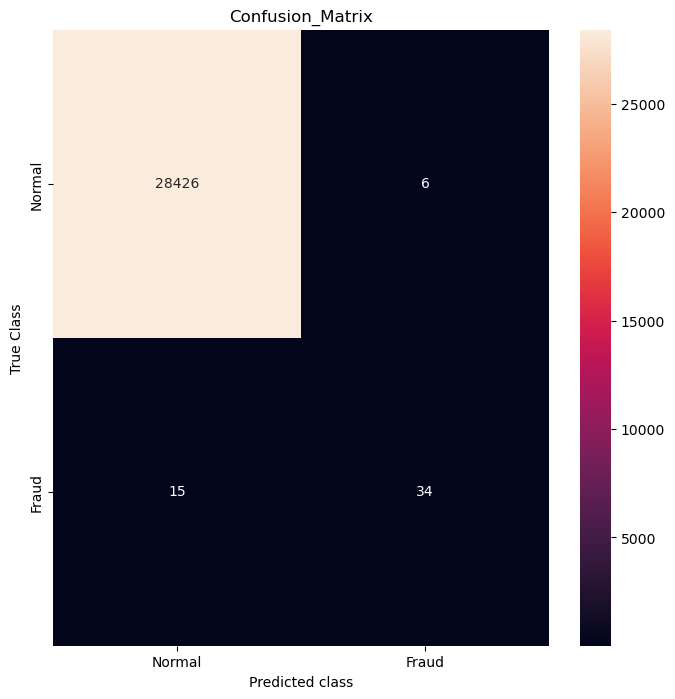

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


labels = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot = True, fmt='d')
plt.title('Confusion_Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

Begin to adjust some of the hyperparameters to get a better model. Add the class_weight value of 'balanced'
to the model in order to more evenly penalize the model between the minority and majority classes. Fit and train
the model

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
y = df['Class']
x = df.drop(['Class', 'Amount', 'Time'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size=0.1, random_state=42, stratify=y)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Show confusion matrix for the balanced model

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[27657,   775],
       [    4,    45]])

Plot the confusion matrix of the new model

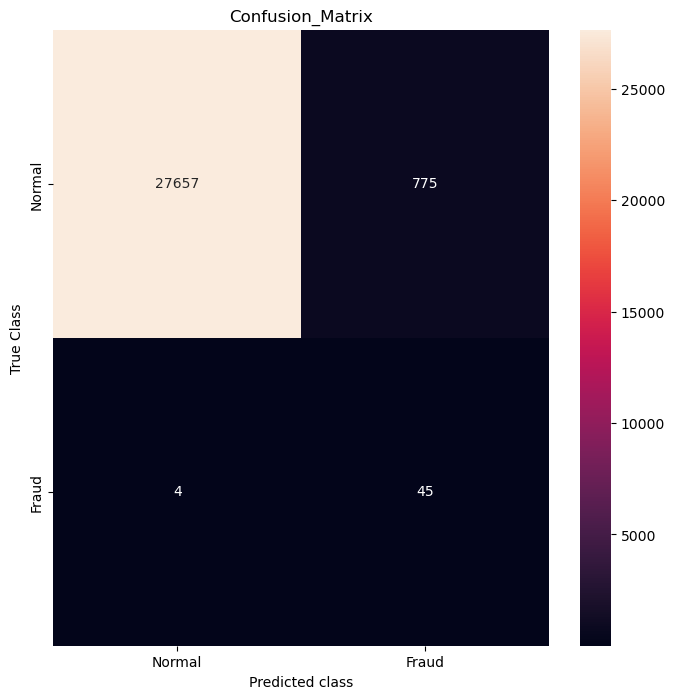

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot = True, fmt='d')
plt.title('Confusion_Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

As we can see, we have fewer false negatives, but many more false positives. It would depend on the 
circumstances how much more costly one type of mistake would be than the other

Here we will specify exactly the ratio of the different classes that end up in the train and test data sets

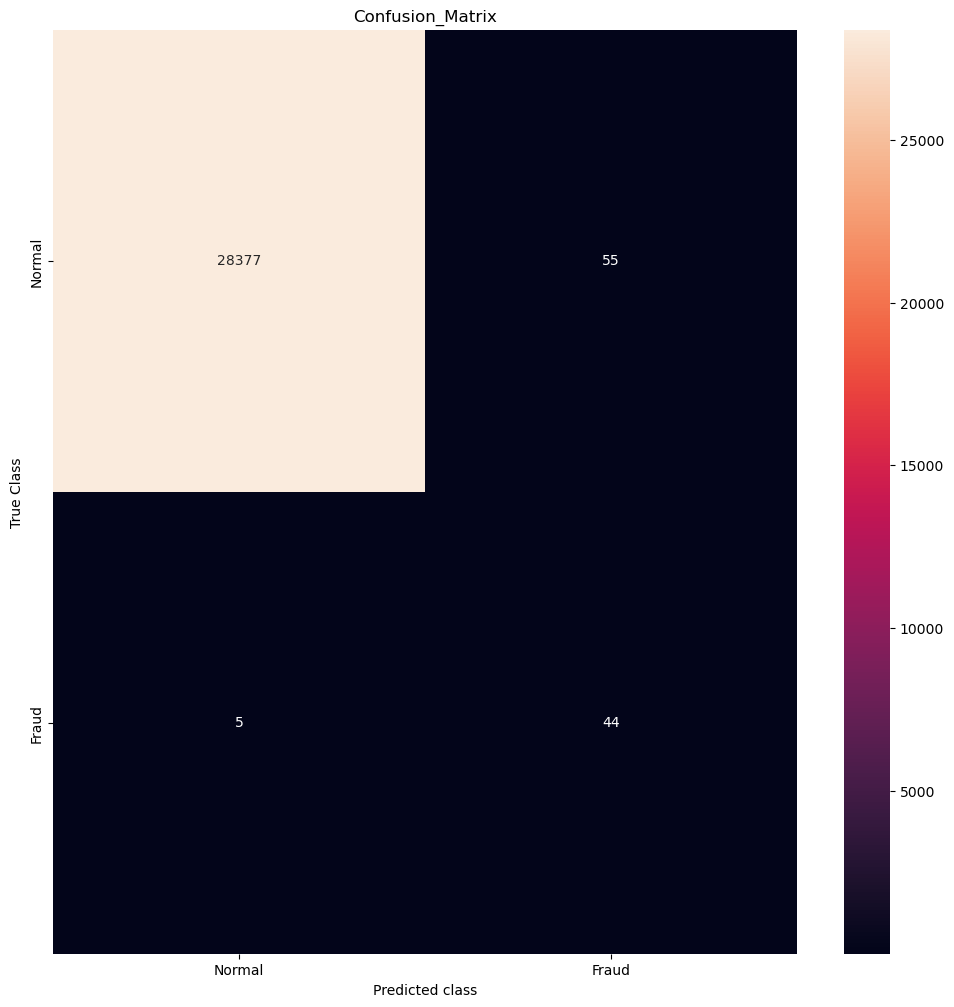

In [23]:
model = LogisticRegression(class_weight={0:1, 1:50})

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

labels = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot = True, fmt='d')
plt.title('Confusion_Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()


This is probably the best model so far, as in the context of credit card fraud,
a false negative is probably more costly than a false positive

Display the classes and the coefficients for the model

In [24]:
model.classes_
model.coef_
model.intercept_

array([-5.61540575])

Show the probability of belonging to each class for each record of the x_test data set

In [25]:
model.predict_proba(x_test)

array([[0.98667522, 0.01332478],
       [0.99558961, 0.00441039],
       [0.99587779, 0.00412221],
       ...,
       [0.99220802, 0.00779198],
       [0.99792357, 0.00207643],
       [0.994318  , 0.005682  ]])

Now we'll try a gradient-boosted algorithm to classify the data

In [26]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
y_pred = model.predict(x_test)

In [28]:
confusion_matrix(y_test, y_pred)

array([[28430,     2],
       [    8,    41]])

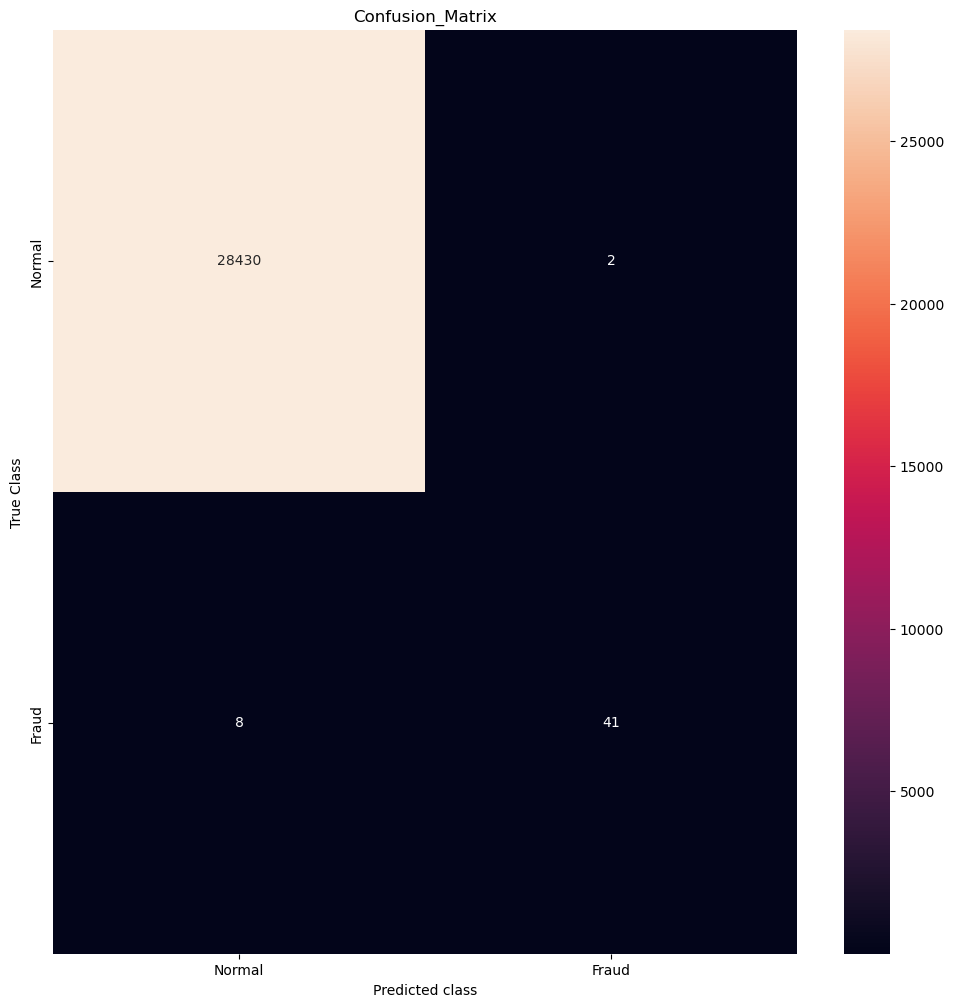

In [29]:
labels = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot = True, fmt='d')
plt.title('Confusion_Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

We can see that at the cost a few more false negatives, we have greatly reduced the number
of false positives

Increase the penalty for missclassifying the minority class

In [30]:
model = xgb.XGBClassifier(scale_pos_weight = 100)


In [31]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = model.predict(x_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[28427,     5],
       [    8,    41]])

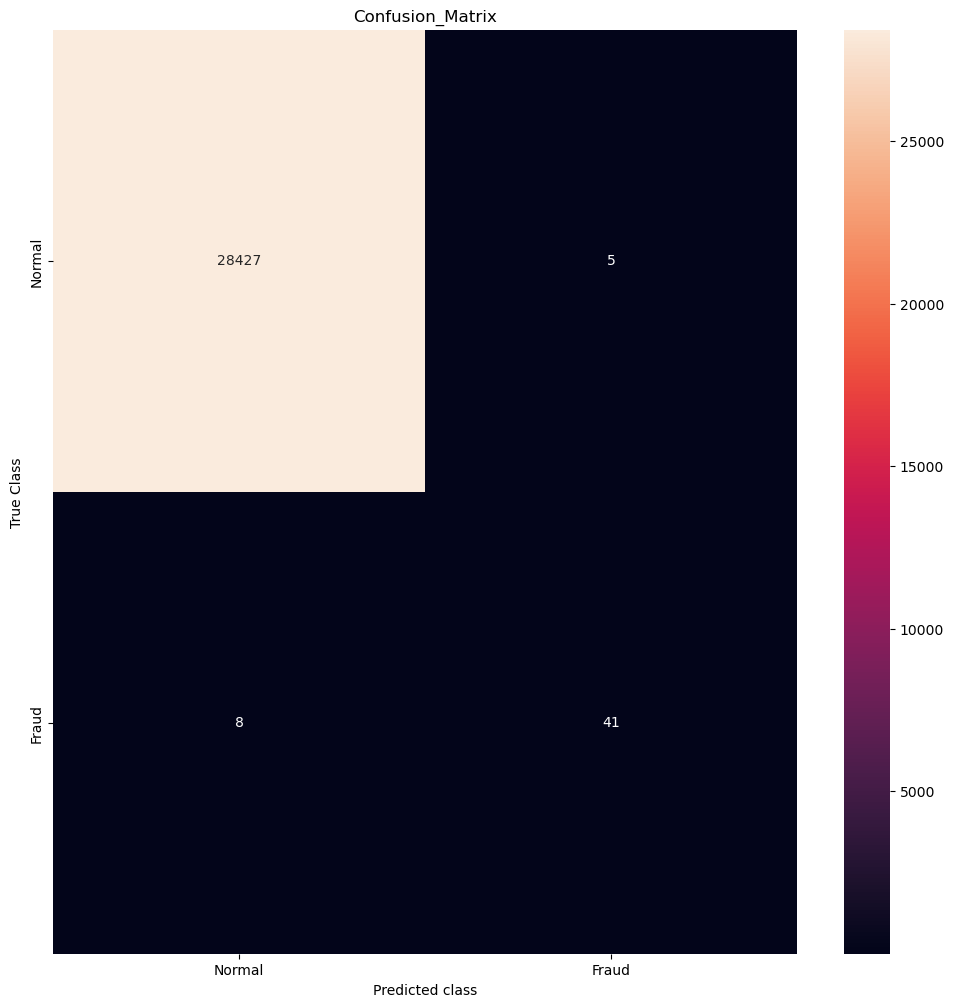

In [34]:
labels = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot = True, fmt='d')
plt.title('Confusion_Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

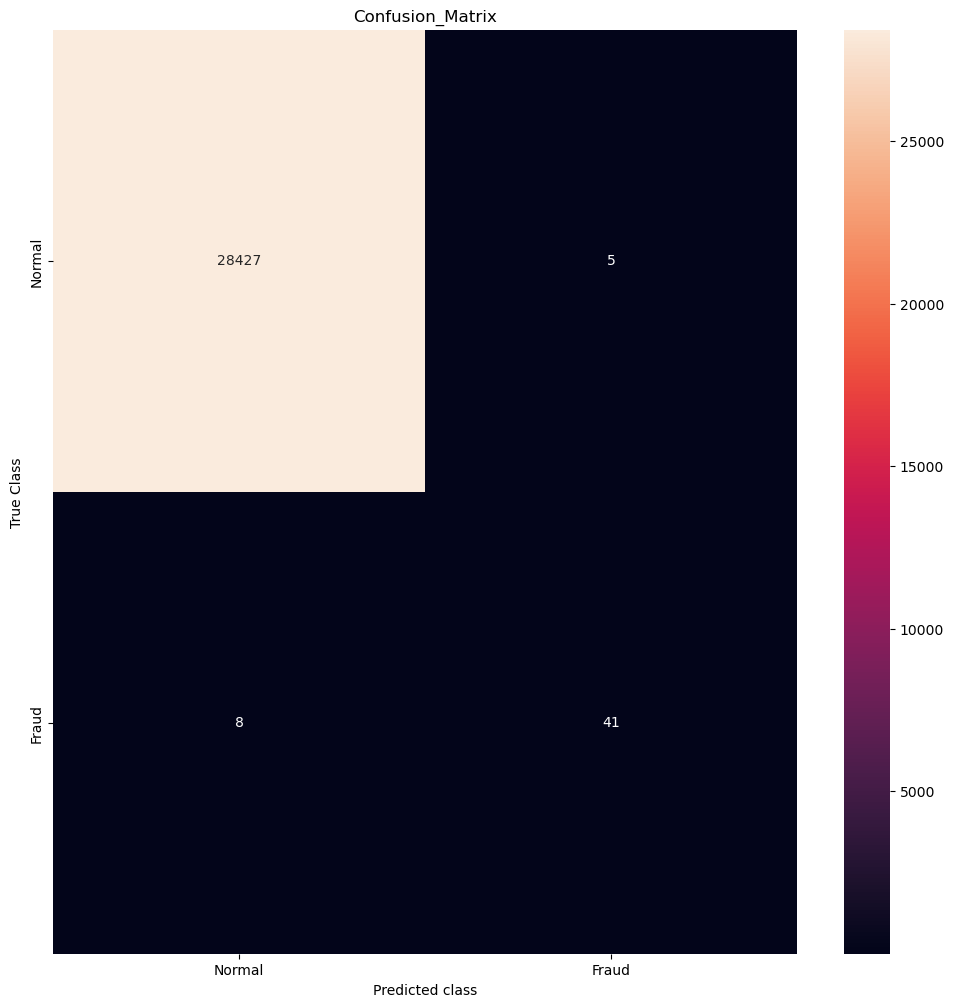

In [35]:
model = xgb.XGBClassifier(max_depth =  5, scale_pos_weight = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

labels = ['Normal', 'Fraud']

conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot = True, fmt='d')
plt.title('Confusion_Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

This model performs slightly worse than the prior

We will make a simple formula that counts the cost of each possible outcome of the classification, the true negatives, false positives, false negatives, and the true positives

In [36]:
print(conf_matrix_xgb[0][0])
print(conf_matrix_xgb[0][1])
print(conf_matrix_xgb[1][0])
print(conf_matrix_xgb[1][1])

28426
6
9
40


We'll assign arbitrary values to each. In this context, as stated above, we would probably
consider a false negative to be more costly than a false positive

In [37]:
cost_tn = 1
cost_fp = 10
cost_fn = 100
cost_tp = 1

In [38]:
total_cost_of_fraud_xgb = (cost_tn * conf_matrix_xgb[0][0])+ (cost_fp * conf_matrix_xgb[0][1])+ (cost_fn * conf_matrix_xgb[1][0])+ (cost_tp * conf_matrix_xgb[1][1])

In [39]:
total_cost_of_fraud_xgb

29426

We'll rerun the logistic regression model from above to calculate its cost

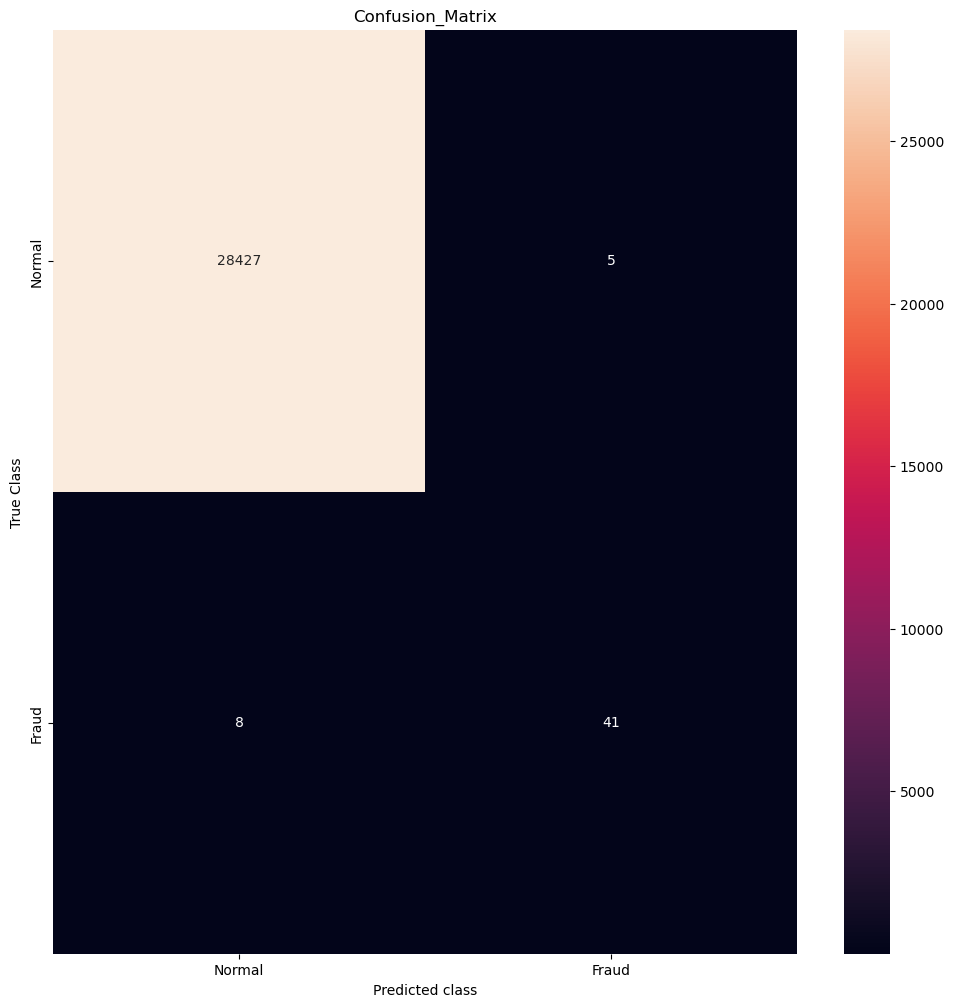

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

labels = ['Normal', 'Fraud']

conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot = True, fmt='d')
plt.title('Confusion_Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()

In [41]:
print(conf_matrix_xgb[0][0])
print(conf_matrix_xgb[0][1])
print(conf_matrix_xgb[1][0])
print(conf_matrix_xgb[1][1])

cost_tn = 1
cost_fp = 10
cost_fn = 100
cost_tp = 1

total_cost_of_fraud_xgb = (cost_tn * conf_matrix_xgb[0][0])+ (cost_fp * conf_matrix_xgb[0][1])+ (cost_fn * conf_matrix_xgb[1][0])+ (cost_tp * conf_matrix_xgb[1][1])

total_cost_of_fraud_xgb

28426
6
15
34


30020

Rerun the gradient-boosted model from above to calculate precision, recall, and other evaluation metrics

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size=0.1, random_state=42, stratify=y)
model = xgb.XGBClassifier(max_depth =  5, scale_pos_weight = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[28426,     6],
       [    9,    40]])

In [43]:
from sklearn.metrics import (classification_report, precision_score, recall_score,
                            average_precision_score, roc_auc_score,
                            f1_score, matthews_corrcoef)

Calculate precision, proportion of correctly identified fraudulent transactions, TP / TP + FP

In [44]:
precision_score(y_test, y_pred)

0.8695652173913043

Calculate Recall, proportion of fraudulent cases that are successfully predicted, TP / TP + FN

In [45]:
recall_score(y_test, y_pred)

0.8163265306122449

Calculate f1, harmonic mean of precision and recall
2 * ((P * R) / (P + R))

In [46]:
f1_score(y_test, y_pred)

0.8421052631578948

In [47]:
roc_auc_score(y_test, y_pred)

0.9080577503933481

Because of the class imbalance, a better metric is the area under
the precision-recall curve

In [48]:
average_precision_score(y_test, y_pred)


0.7101651571945705

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.87      0.82      0.84        49

    accuracy                           1.00     28481
   macro avg       0.93      0.91      0.92     28481
weighted avg       1.00      1.00      1.00     28481

